In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def vec_to_polar(vec):
    
    unit = vec / np.linalg.norm(vec)
    assert unit.shape == vec.shape
    
    theta = np.arctan2( np.sqrt( np.square(unit[...,0]) + np.square(unit[...,1]) ), unit[...,2])
    phi = np.arctan2(unit[...,1], unit[...,0])

    return theta, phi
    

In [20]:
base_dir = '/Users/tjlane/Desktop/PL-workshop/signals_chain_A_vs_B/orient/'
#amat_file = 'crystal_Amatrices_TD_all.npy'
amat_file = 'crystal_Amatrices_100us_light.npy'
A_matrices = np.load(base_dir + amat_file)
print(A_matrices.shape)

(83830, 3, 3)


In [21]:
A_matrices_transposed = np.transpose(A_matrices, axes=(0,2,1))
theta, phi = vec_to_polar(A_matrices_transposed)

#theta, phi = vec_to_polar(A_matrices)

print(theta.min(), theta.max(), theta.shape)
print(phi.min(), phi.max(), phi.shape)

0.0007890971451536436 3.138518408023848 (83830, 3)
-3.141582902182307 3.1414545659152293 (83830, 3)


/var/folders/s9/bht_sc9n7ys6m0q3h_3htntc0000gn/T/ipykernel_97268/1092541485.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pc = ax[i].pcolormesh(A, R, hist.T, cmap="magma_r")


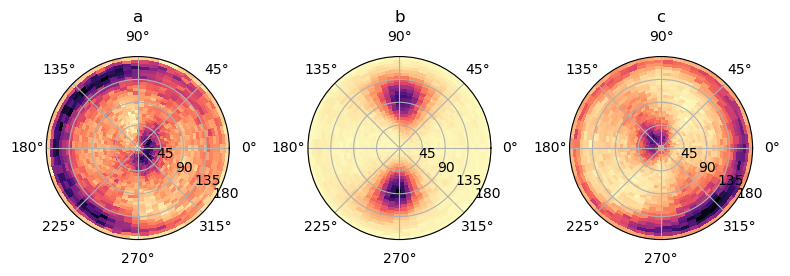

In [22]:
rbins = np.linspace(0, 180, 30)
abins = np.linspace(-np.pi, np.pi, 60)

fig, ax = plt.subplots(
    figsize=(8,3),
    subplot_kw={'projection': 'polar'}, 
    ncols=3,
)

titles = ["a", "b", "c"]

for i in range(3):

    ax[i].set_title(titles[i])

    hist, _, _ = np.histogram2d(phi[:,i], np.degrees(theta[:,i]), bins=(abins, rbins))
    A, R = np.meshgrid(abins, rbins)

    pc = ax[i].pcolormesh(A, R, hist.T, cmap="magma_r")
    
    ax[i].set_rmax(180)
    ax[i].set_rticks([45, 90, 135, 180])
    ax[i].set_rlabel_position(-35.0)
    ax[i].grid(True)


plt.tight_layout()
plt.savefig(base_dir + amat_file[:-4] + '.png')
plt.show()